In [365]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv('datasets_4458_8204_winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [366]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Проверим, есть ли в данных продублированные строки

In [367]:
sum(df.duplicated())

240

#### Удалим дублированные строки

In [368]:
df.drop_duplicates(inplace = True)


#### выделим вектор целевой переменной

In [369]:
Y = df['quality']
df = df.drop(['quality'], axis = 1)

#### Проверим, есть ли пропуски в данных



In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
dtypes: float64(11)
memory usage: 127.4 KB


#### Нам повезло, пропусков в данных нет

#### Теперь посмотрим на диаграмме как распределены классы качества

In [371]:
Y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

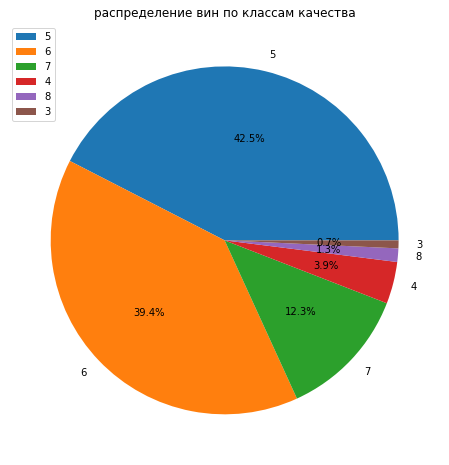

In [372]:
values = list(Y.value_counts())
labels = ['5','6','7','4', '8', '3']
fig = plt.figure(figsize = (8,8))
plt.title('распределение вин по классам качества')
plt.pie(values, labels = labels, autopct = '%.1f%%')
plt.legend()

Видим, что классы у нас распределены неравномерно, нормальных вин больше, чем плохих и самых лучших

#### получим веса классов, они понадобятся в будущем для обучения модели

In [373]:
from sklearn.utils.class_weight import compute_class_weight
class_weigths = compute_class_weight('balanced', [5,6,7,4,8,3], Y)
class_weights_dic = dict(zip([5,6,7,4,8,3], class_weigths))


#### Посмотрим на распределения признаков

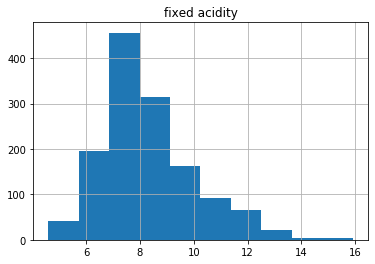

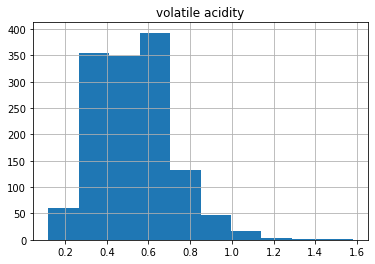

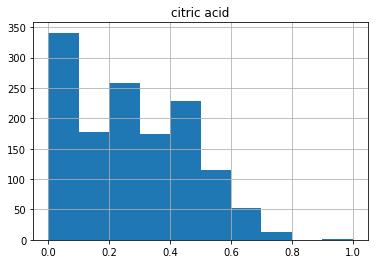

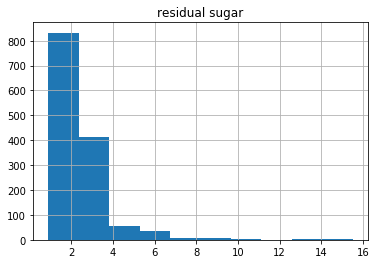

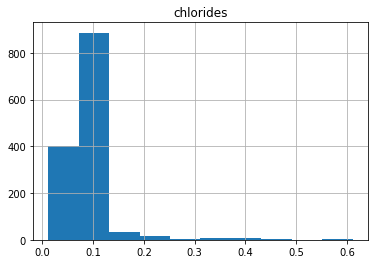

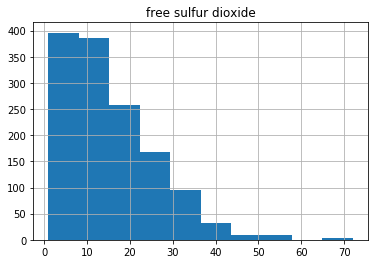

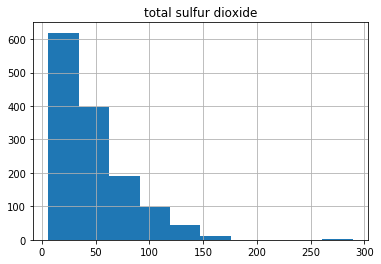

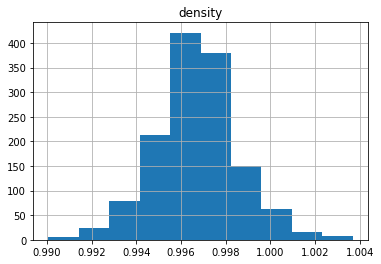

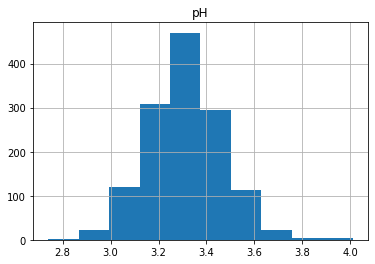

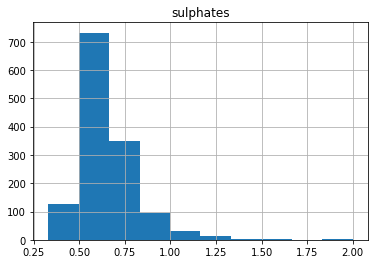

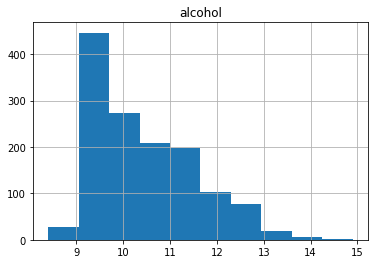

In [374]:
for i in df.columns:
    df.hist(i)

#### А теперь посмотрим как между собой соотносится каждый признак и качество вина

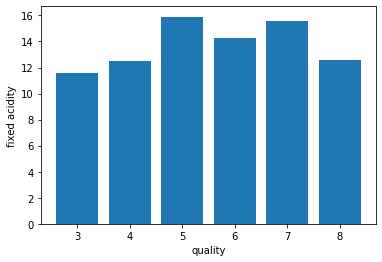

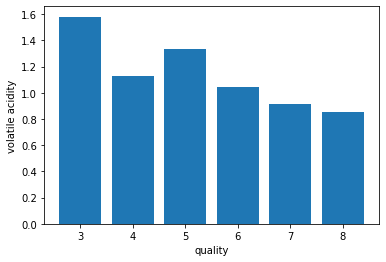

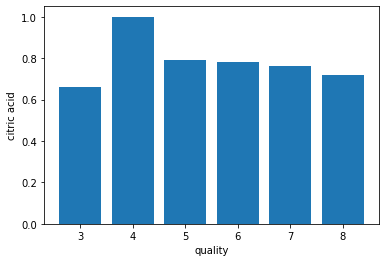

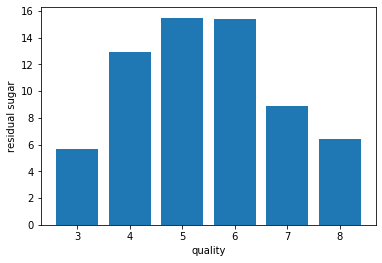

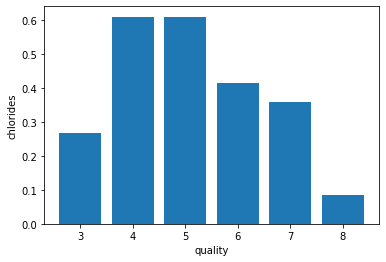

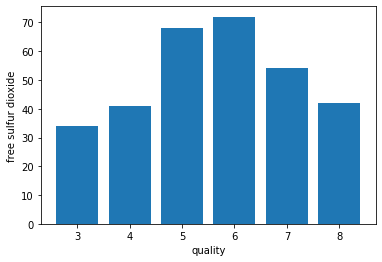

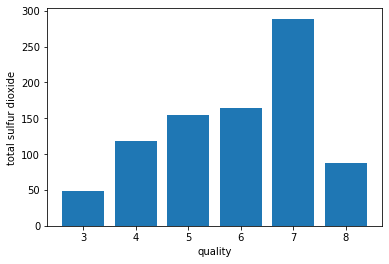

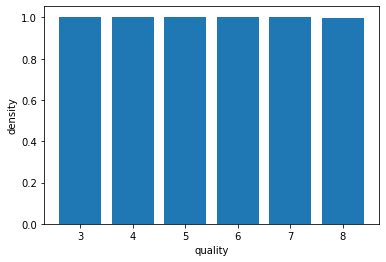

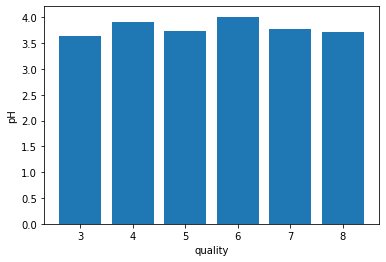

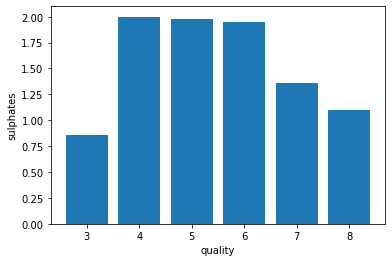

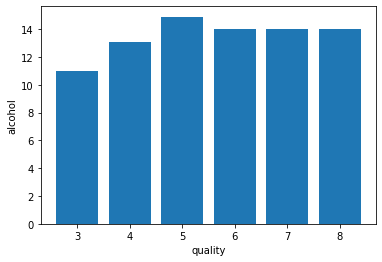

In [382]:
for i in df.columns:    
    plt.bar(x=Y, height=i,data = df)
    plt.xlabel("quality")
    plt.ylabel(i)
    plt.show()
    

#### Разделим датаест на тренировочную и тестовую выборку

In [402]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(df, Y, test_size = 0.3, random_state = 42)

#### Обучим решающее дерево

In [425]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state= 42, class_weight= class_weights_dic)
dtc.fit(X_train, Y_train)
y_tree_pred = dtc.predict(x_test)

#### Проверим точность модели

In [427]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_tree_pred)

0.4803921568627451

Попробуем подобрать наиболее оптимальный параметр min_smples_leaf

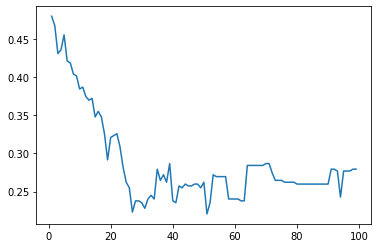

In [428]:
res = []
ls = [i for i in range(1, 100)]

for i in range(1, 100):
    dtc = DecisionTreeClassifier(random_state= 42, min_samples_leaf = i, class_weight= class_weights_dic)
    dtc.fit(X_train, Y_train)
    y_tree_pred = dtc.predict(x_test)
    res.append(accuracy_score(y_test, y_tree_pred))
plt.plot(ls, res)  



In [430]:
best_param = res.index(max(res)) + 1
best_param

1

Видим, что дефолтное значение этого параметра самое лучшее

#### Попробуем обучить алгоритм k ближайших соседей

In [431]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
y_knn_pred = knn.predict(x_test)

Выберем оптимальное количество соседей

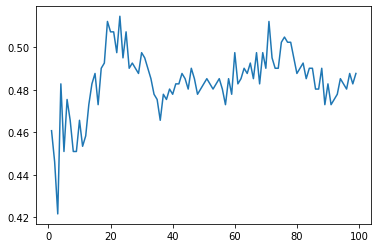

In [432]:
res = []
ls = [i for i in range(1, 100)]

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    y_knn_pred = knn.predict(x_test)
    res. append(accuracy_score(y_test, y_knn_pred))
plt.plot(ls, res)  

In [433]:
best_param = res.index(max(res)) + 1
best_param

23

In [434]:
knn = KNeighborsClassifier(n_neighbors = best_param)
knn.fit(X_train, Y_train)
y_knn_pred = knn.predict(x_test)

#### Проверим точность модели knn

In [435]:
accuracy_score(y_test, y_knn_pred)

0.5147058823529411